**PROBLEM**

**Build a sophisticated Machine Learning model that predicts the probability percentage of marketing leads purchasing their product, based on information provided in the given dataset.**

# ***IMPORTING ALL THE NECESSARY LIBRARIES***

In [84]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as pe
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ***GETTING TO KNOW THE DATASET***

In [85]:
df=pd.read_csv("marketing_leads.csv")
df.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [169]:
df2=pd.read_csv("marketing_leads1.csv")
df2.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleAD16O,Bonilla Ltd Inc,Investment Bank/Brokerage,200988$,NaN,2020-04-15,Product_1,167.332.2751x989,100 - 500 Million,Category 4,India,Bhubaneshwar,sonia,Chairman/CEO/President,maureenthomas@bonilla.com,"Designer, fashion/clothing",Marketing Event,Level 1,more than a month,"Massiah,Gerard F",No,-1.0
1,TitleOW6CR,"Williams, Rogers and Roach PLC",Electronics,409961$,2541758.2$,2021-01-23,Product_1,001-486-903-0711x7831,100 - 500 Million,Category 3,USA,"Coeur d'Alene, ID",Daniel Bell,CEO/Co-Founder/Chairman,danielbell@williams.com,Horticultural consultant,Marketing Event,Level 2,Up-to-date,"Smith,Keenan H",Yes,1.0
2,TitleVVJQ5,"Wood, Vaughn and Morales Ltd",Banks,434433$,3041031.0$,2020-07-19,Product_1,(393)104-2610x9723,100 - 500 Million,Category 1,USA,"Portland-South Portland, ME",Andrew Davis,Chairman/Chief Innovation Officer,andrewdavis@wood.com,Information officer,Marketing Event,Level 2,Did not hear back after Level 1,"Gilley,Janine",Deliverable,5.0
3,TitleUS8NA,Durham-Crawford Inc,Music,218952$,1521716.4$,2020-02-27,Product_2,(817)040-4599,100 - 500 Million,Category 1,India,Bareilly,shital,CEO/Chairman/President,charlesrivera@durhamcrawford.com,Commercial/residential surveyor,Contact Email,Level 3,more than a month,"Morsy,Omar A",No,5.0
4,Title5VGWW,"Simpson, Duncan and Long LLC",Real Estate,392835$,2455218.75$,2020-10-25,Product_1,718-032-5726x76098,500 Million - 1 Billion,Category 3,USA,"Trenton, NJ",Shelly Stephenson,CEO/Co-Founder/Chairman,shellystephenson@simpson.com,Wellsite geologist,Others,Level 3,More than 2 weeks,"Morsy,Omar A",Deliverable,2.0


In [57]:
df.shape

(7007, 23)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7007 entries, 0 to 7006
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             7007 non-null   object 
 1   Lead_name              7007 non-null   object 
 2   Industry               7006 non-null   object 
 3   Deal_value             6956 non-null   object 
 4   Weighted_amount        6482 non-null   object 
 5   Date_of_creation       7007 non-null   object 
 6   Pitch                  7007 non-null   object 
 7   Contact_no             7007 non-null   object 
 8   Lead_revenue           7007 non-null   object 
 9   Fund_category          7007 non-null   object 
 10  Geography              6035 non-null   object 
 11  Location               6996 non-null   object 
 12  POC_name               6999 non-null   object 
 13  Designation            7007 non-null   object 
 14  Lead_POC_email         7007 non-null   object 
 15  Hiri

In [59]:
df.columns

Index(['Deal_title', 'Lead_name', 'Industry', 'Deal_value', 'Weighted_amount',
       'Date_of_creation', 'Pitch', 'Contact_no', 'Lead_revenue',
       'Fund_category', 'Geography', 'Location', 'POC_name', 'Designation',
       'Lead_POC_email', 'Hiring_candidate_role', 'Lead_source',
       'Level_of_meeting', 'Last_lead_update', 'Internal_POC', 'Resource',
       'Internal_rating', 'Success_probability'],
      dtype='object')

In [60]:
df.isnull().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                51
Weighted_amount          525
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                972
Location                  11
POC_name                   8
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         633
Internal_POC               0
Resource                 149
Internal_rating            0
Success_probability        0
dtype: int64

In [61]:
df.nunique()

Deal_title               7007
Lead_name                7007
Industry                  171
Deal_value               6907
Weighted_amount          6480
Date_of_creation          777
Pitch                       2
Contact_no               7007
Lead_revenue                3
Fund_category               4
Geography                   2
Location                  597
POC_name                 5261
Designation                10
Lead_POC_email           7007
Hiring_candidate_role     639
Lead_source                 4
Level_of_meeting            3
Last_lead_update           11
Internal_POC               60
Resource                    6
Internal_rating             5
Success_probability       248
dtype: int64

# ***DATA CLEANING/DROPPING UNWANTED COLUMNS***

In [86]:
df = df.drop(columns=['Lead_name', 'Contact_no','Lead_POC_email','POC_name','Date_of_creation'])

In [170]:
df2 = df2.drop(columns=['Lead_name', 'Contact_no','Lead_POC_email','POC_name','Date_of_creation'])

In [62]:
df.drop(['Deal_title','Lead_name','Date_of_creation','Contact_no','Geography','POC_name','Designation','Lead_POC_email','Hiring_candidate_role','Internal_POC'],inplace=True,axis=1)

# ***HANDLING ERRORS IN DATATYPES OF COLUMNS***

In [ ]:
df['Deal_value'] = df['Deal_value'].str.replace('$', '')

In [173]:

df2['Deal_value'] = df2['Deal_value'].str.replace('$', '')

In [96]:
df['Weighted_amount'] = df['Weighted_amount'].str.replace('$', '')

In [177]:
df2['Weighted_amount'] = df2['Weighted_amount'].str.replace('$', '')

In [171]:
df['Industry'].fillna('Hotels/Motels', inplace = True)
df2['Industry'].fillna('Hotels/Motels', inplace = True)


In [88]:
df['Deal_value']

0       320506
1        39488
2       359392
3        76774
4       483896
         ...  
7002    192800
7003    220208
7004    253608
7005    118615
7006    258627
Name: Deal_value, Length: 7007, dtype: object

In [79]:
df["Deal_value"]= df["Deal_value"].astype(float)
df["Weighted_amount"]= df["Weighted_amount"].astype(float)

In [174]:
df2["Deal_value"]= df2["Deal_value"].fillna(0).astype(int)

In [178]:
df2["Weighted_amount"]= df2["Weighted_amount"].fillna(0).astype(float)

# ***HANDLING MISSING VALUES***

In [ ]:
df.Location.fillna("NA",inplace=True)

In [90]:
df["Deal_value"]= df["Deal_value"].fillna(0).astype(int)

In [97]:
df["Weighted_amount"]= df["Weighted_amount"].fillna(0).astype(float)

In [ ]:
df.Location.fillna(0,inplace=True)

# ***ONE HOT ENCODING***

In [ ]:
cat=list(df.select_dtypes(exclude=(np.number)).columns)

In [ ]:
cat

['Industry',
 'Pitch',
 'Lead_revenue',
 'Fund_category',
 'Location',
 'Lead_source',
 'Level_of_meeting',
 'Last_lead_update',
 'Resource']

In [ ]:
df.isnull().sum()

Industry                 1
Deal_value               0
Weighted_amount          0
Pitch                    0
Lead_revenue             0
Fund_category            0
Location                 0
Lead_source              0
Level_of_meeting         0
Last_lead_update       633
Resource               149
Internal_rating          0
Success_probability      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Location,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Success_probability
1,Construction Services,39488.0,2.408768e+05,Product_2,500 Million - 1 Billion,Category 4,Ratlam,Others,Level 1,Did not hear back after Level 1,No,5,58.90
2,Hospitals/Clinics,359392.0,2.407926e+06,Product_1,500 Million - 1 Billion,Category 4,"Albany-Schenectady-Troy, NY",Marketing Event,Level 1,?,No,4,68.80
3,Real Estate,76774.0,4.683214e+05,Product_2,500 Million - 1 Billion,Category 3,"Mount Vernon-Anacortes, WA",Contact Email,Level 2,Did not hear back after Level 1,We have all the requirements,1,64.50
4,Financial Services,483896.0,1.569884e+06,Product_2,50 - 100 Million,Category 3,Shimoga,Website,Level 2,Up-to-date,No,4,62.40
5,Banks,418674.0,2.637646e+06,Product_1,50 - 100 Million,Category 2,Bulandshahr,Marketing Event,Level 3,2 days back,Deliverable,3,66.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999,Financial Services,31429.0,2.200030e+05,Product_2,500 Million - 1 Billion,Category 4,"Knoxville, TN",Website,Level 3,Up-to-date,Deliverable,4,70.50
7000,Beverages (Alcoholic),152908.0,9.709658e+05,Product_1,100 - 500 Million,Category 1,Kohima,Website,Level 2,5 days back,No,1,62.70
7002,Banks,192800.0,1.195360e+06,Product_1,100 - 500 Million,Category 4,Kagaznagar,Contact Email,Level 1,More than a week back,We have all the requirements,4,107.34
7003,Hospitals/Clinics,220208.0,1.453373e+06,Product_2,100 - 500 Million,Category 1,Proddatur,Marketing Event,Level 2,?,We have all the requirements,3,26.35


In [ ]:
df=pd.get_dummies(df)

# ***EDA - EXPLORATORY DATA ANALYSIS***

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log1p

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



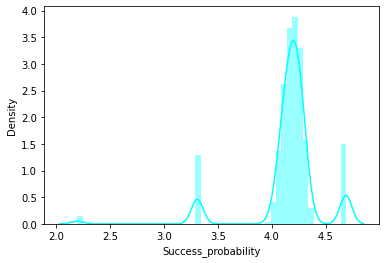

In [ ]:
import seaborn as sb
from matplotlib import pyplot as plt
g=sb.distplot(np.log1p(df['Success_probability']),color="Cyan")

In [91]:
f = np.mean(df['Deal_value'])
f

247838.9200799201

In [175]:
f1 = np.mean(df2['Deal_value'])
f1

247459.56330625896

In [93]:
for i in range (0,len(df)):
  if(df['Deal_value'][i] == 0):
    df['Deal_value'][i] = 247839

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [176]:
for i in range (0,len(df2)):
  if(df2['Deal_value'][i] == 0):
    df2['Deal_value'][i] = 247459

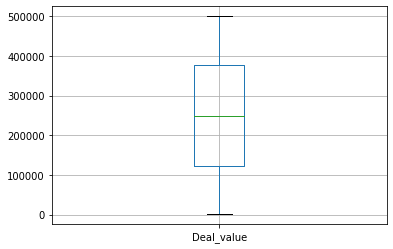

In [ ]:
boxplot = df.boxplot(column=['Deal_value'])

In [63]:
df[df['Industry'].isnull()]

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Location,Lead_source,Level_of_meeting,Last_lead_update,Resource,Internal_rating,Success_probability
4653,NaN,209418$,1266978.9$,Product_2,50 - 100 Million,Category 4,Pilibhit,Contact Email,Level 1,2 days back,No,3,56.6


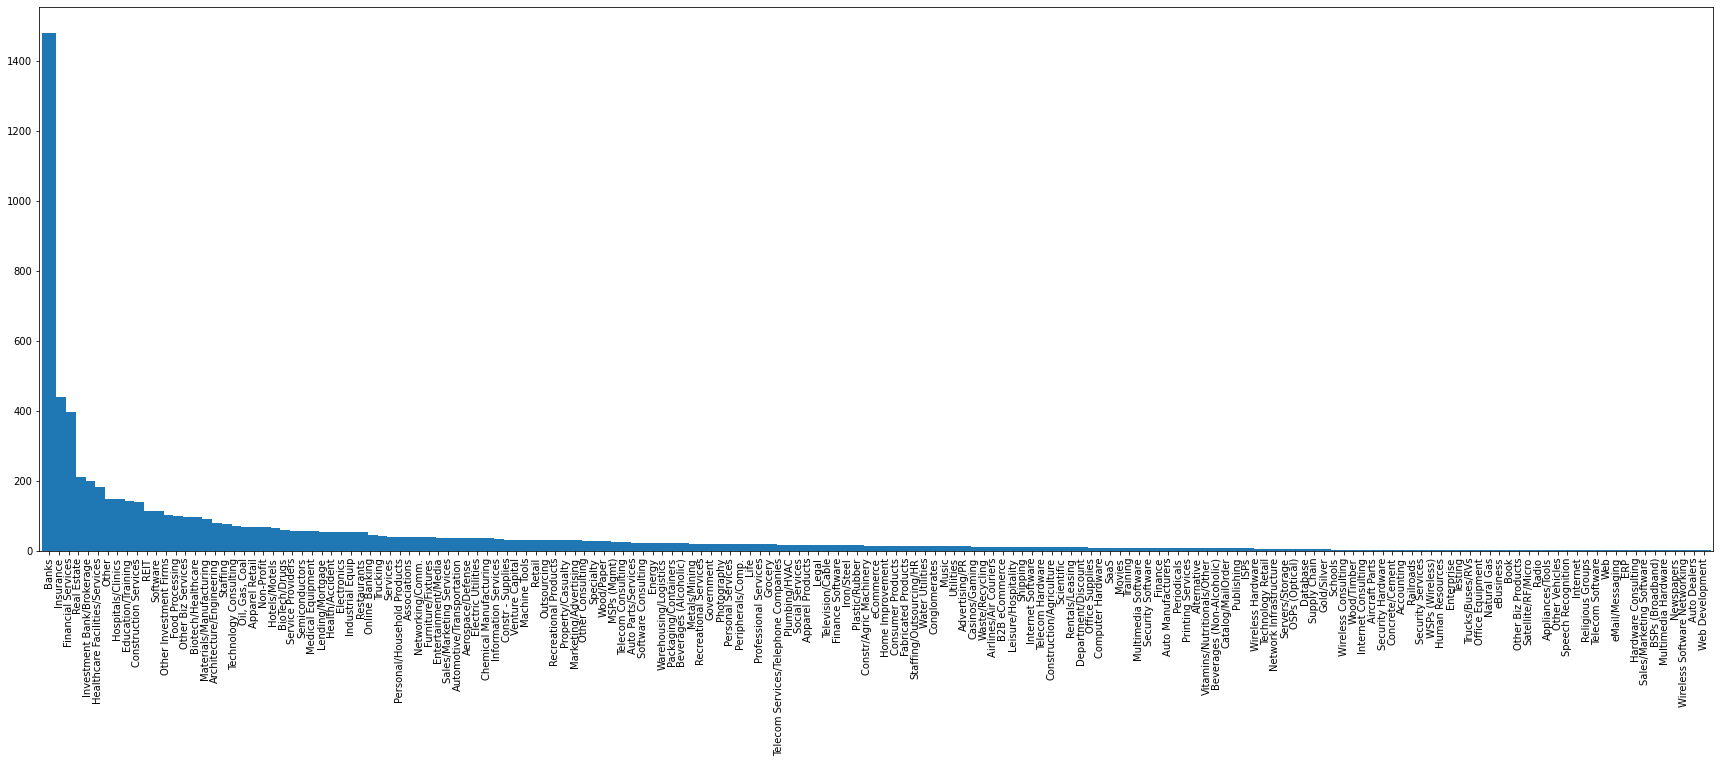

In [65]:
df["Industry"].value_counts().plot(kind='bar',width = 1.5,figsize = (30,10))

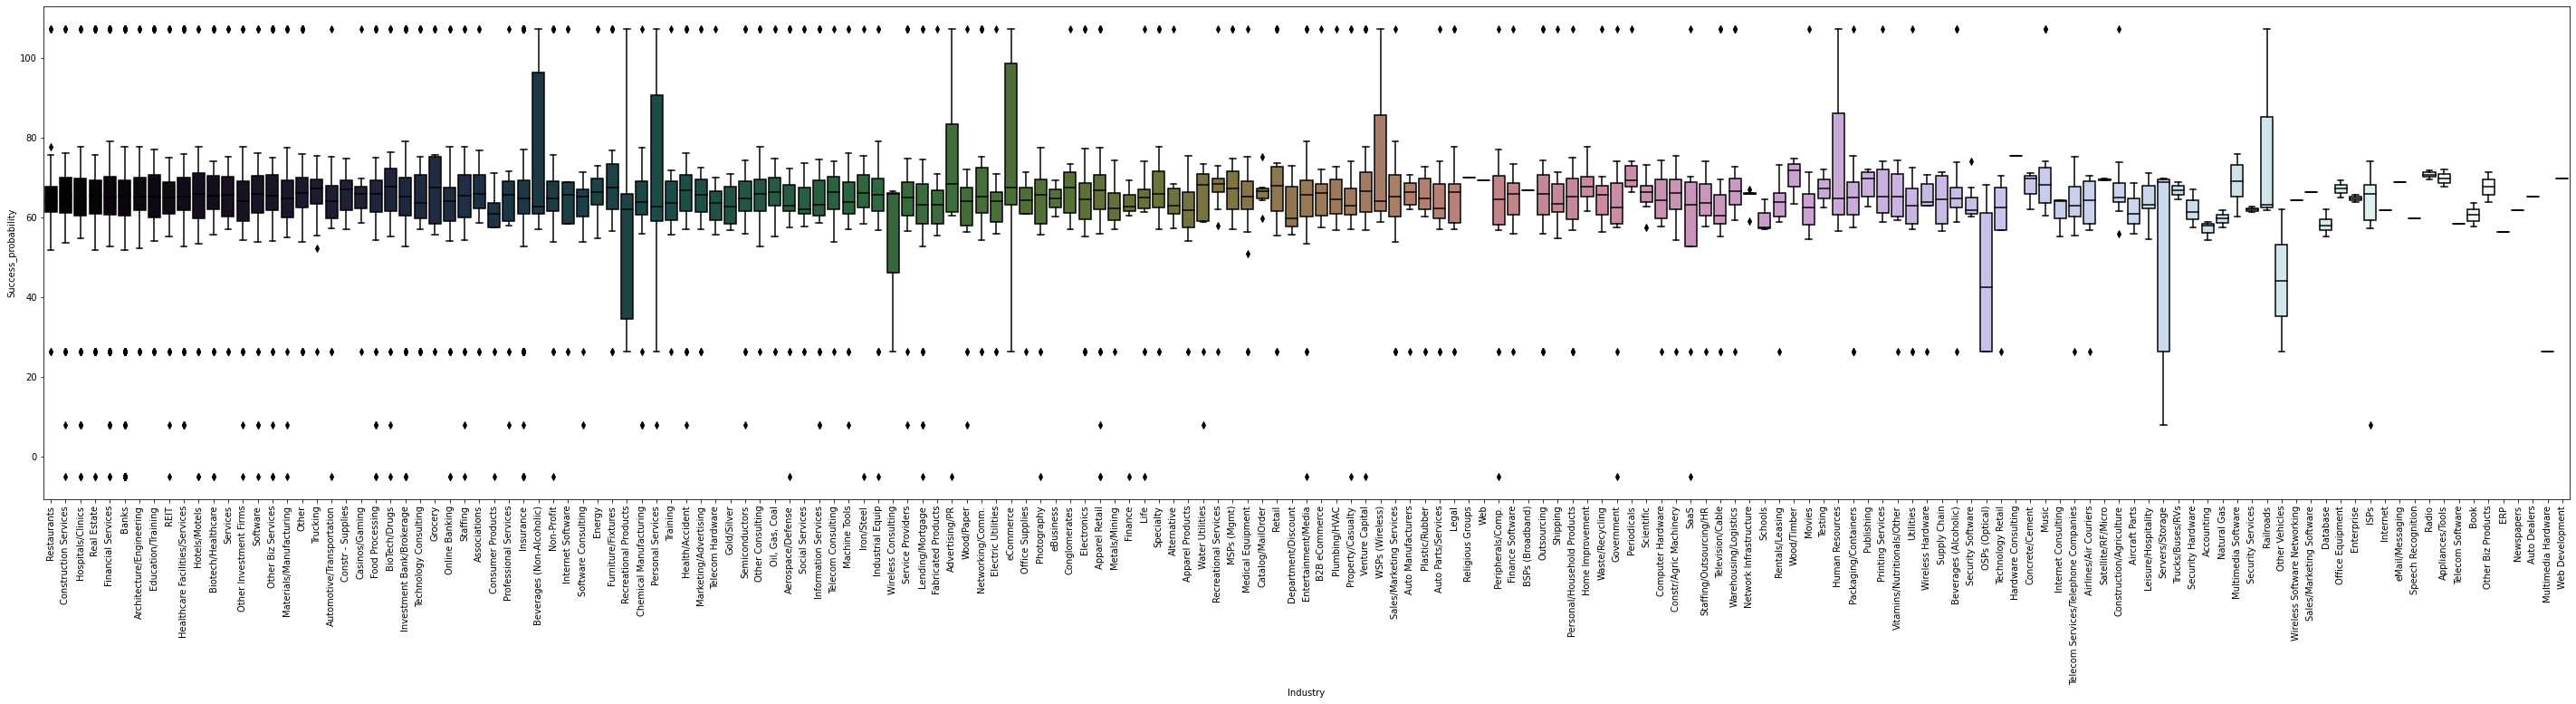

In [66]:
import seaborn as sb
plt.figure(figsize=(50, 10))
sb.boxplot(x="Industry", y="Success_probability", data=df,palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

<Figure size 3600x3600 with 0 Axes>

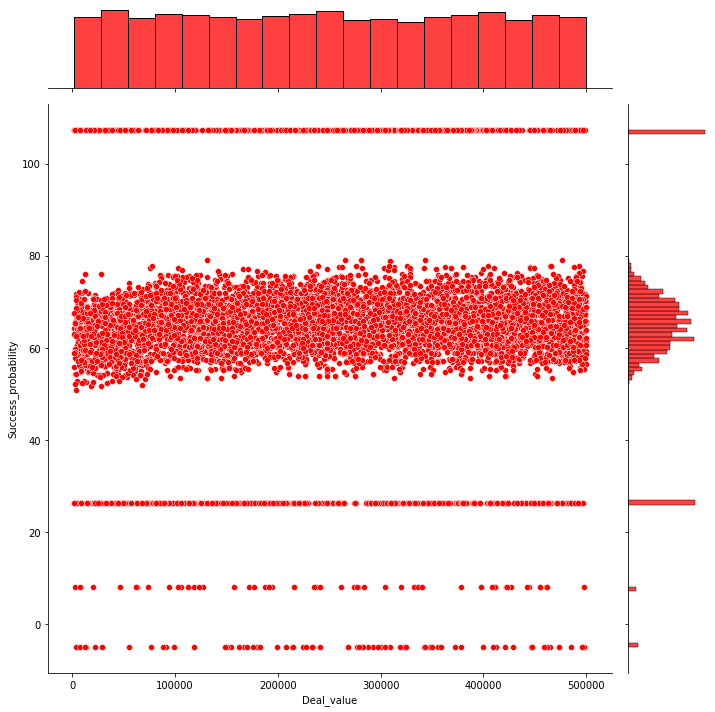

In [94]:
plt.figure(figsize=(50, 50))
sb.jointplot(x='Deal_value',y='Success_probability',data=df, color = 'red' , height =10, ratio = 6)
plt.show()

In [95]:
df['Weighted_amount']

0        2067263.7$
1         240876.8$
2        2407926.4$
3         468321.4$
4               NaN
           ...     
7002     1195360.0$
7003     1453372.8$
7004            NaN
7005      794720.5$
7006    1642281.45$
Name: Weighted_amount, Length: 7007, dtype: object

In [98]:
g = np.mean(df['Weighted_amount'])
g

1452260.0168117583

In [179]:
g2 = np.mean(df2['Weighted_amount'])
g2

1512284.5661968442

In [99]:
for i in range (0,len(df)):
  if(df['Weighted_amount'][i] == 0):
    df['Weighted_amount'][i] = 1452260.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [180]:
for i in range (0,len(df2)):
  if(df2['Weighted_amount'][i] == 0):
    df2['Weighted_amount'][i] = 1512284.5

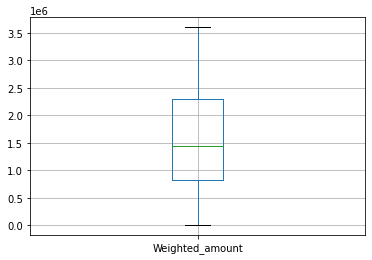

In [100]:
boxplot = df.boxplot(column=['Weighted_amount'])

<Figure size 3600x3600 with 0 Axes>

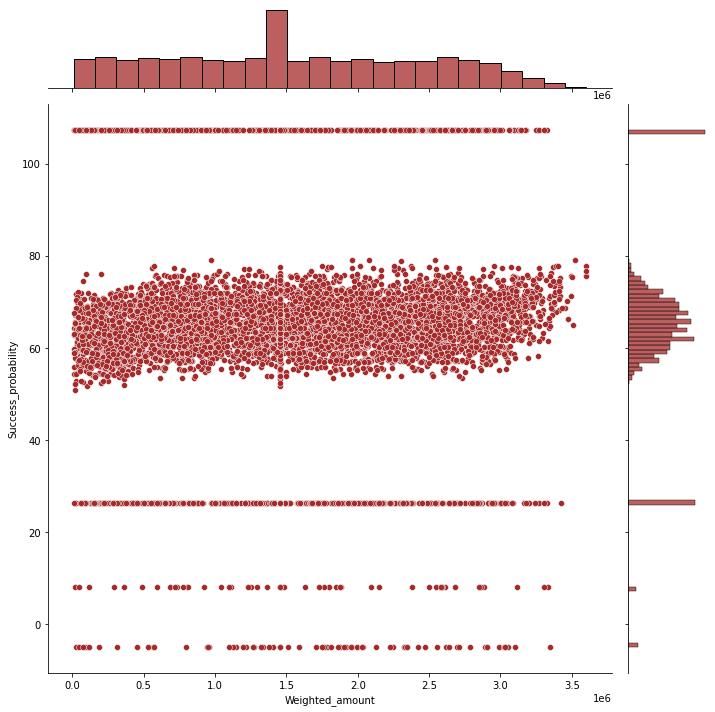

In [101]:
plt.figure(figsize=(50, 50))
sb.jointplot(x='Weighted_amount',y='Success_probability',data=df, color = 'brown' , height =10, ratio = 6)
plt.show()

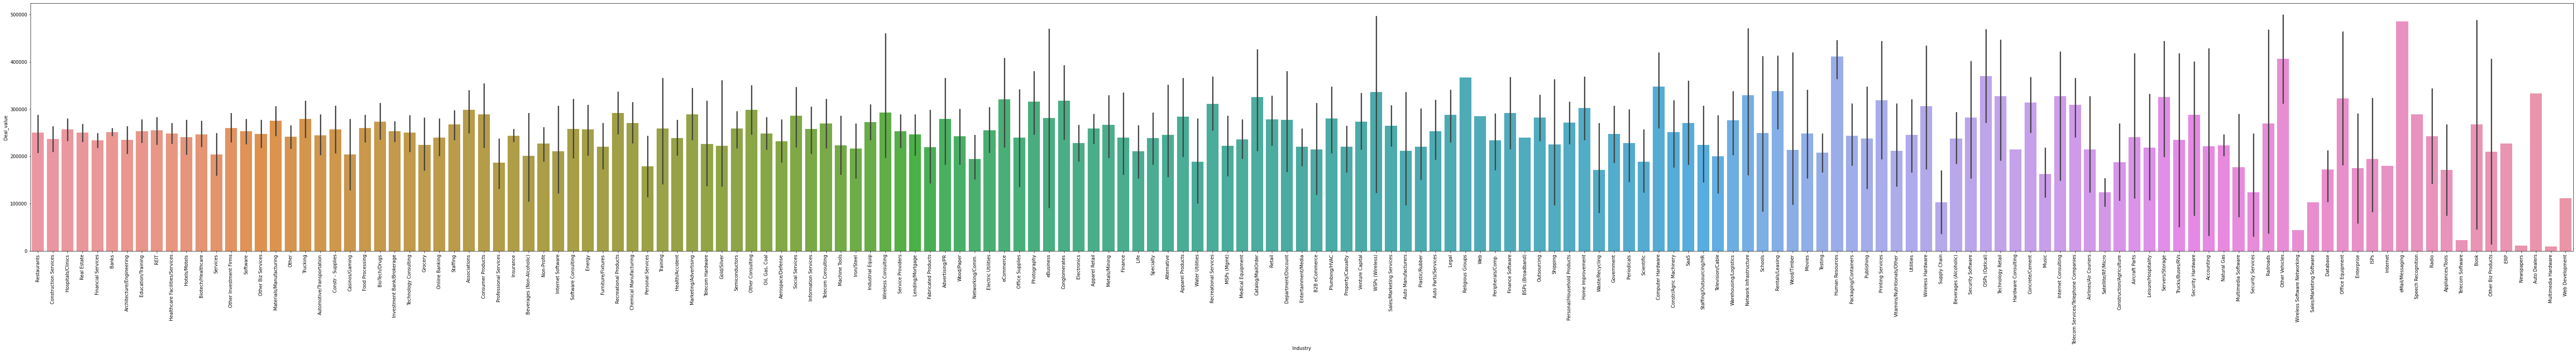

In [102]:
plt.figure(figsize=(100, 10))
sb.barplot(x="Industry", y="Deal_value", data=df)
plt.xticks(rotation=90)
plt.show()

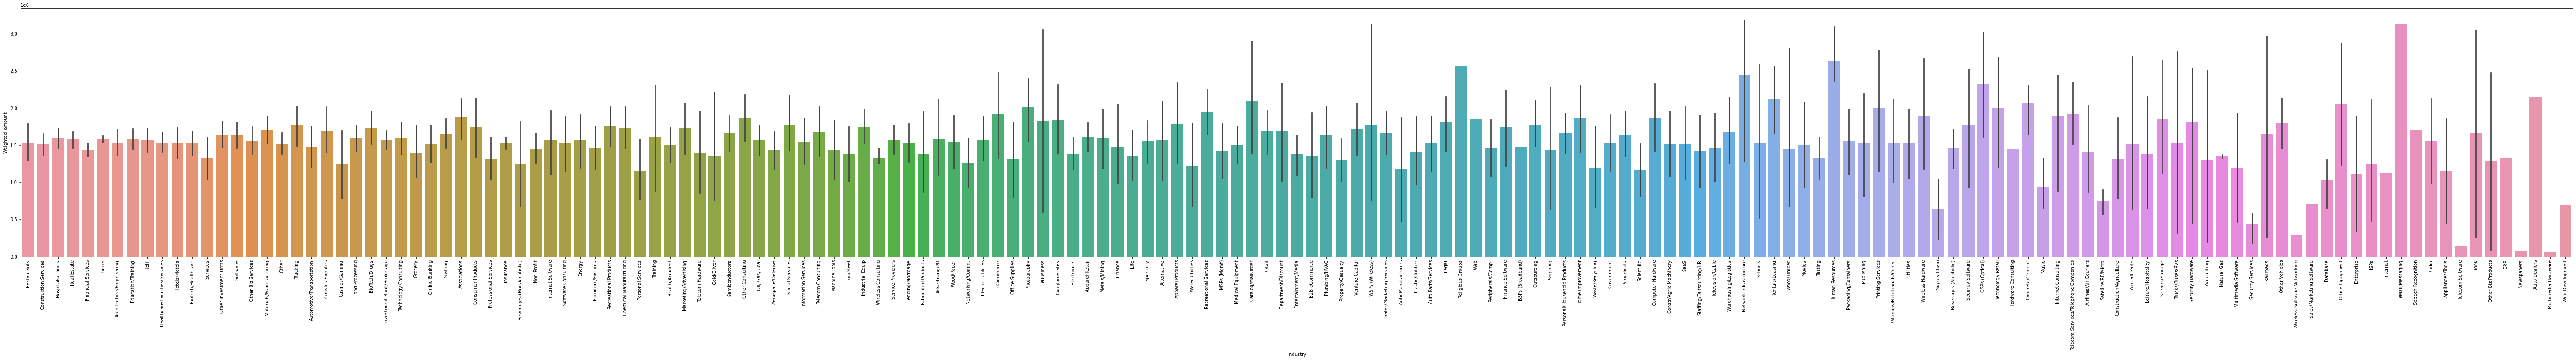

In [103]:
plt.figure(figsize=(100, 10))
sb.barplot(x="Industry", y="Weighted_amount", data=df)
plt.xticks(rotation=90)
plt.show()

In [104]:
df['Pitch'].unique()

array(['Product_2', 'Product_1'], dtype=object)

In [105]:
btype = df["Location"].str.split(",",n=1,expand = True)
df["City"]=btype[0]
df["State"]=btype[1]

In [181]:
btype2 = df2["Location"].str.split(",",n=1,expand = True)
df2["City"]=btype[0]
df2["State"]=btype[1]

In [106]:
df.head()

,Deal_title,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Location,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,City,State
0,TitleM5DZY,Restaurants,320506,2067263.7,Product_2,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6,Killeen-Temple,TX
1,TitleKIW18,Construction Services,39488,240876.8,Product_2,500 Million - 1 Billion,Category 4,India,Ratlam,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9,Ratlam,None
2,TitleFXSDN,Hospitals/Clinics,359392,2407926.4,Product_1,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",SVP/General Counsel,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8,Albany-Schenectady-Troy,NY
3,TitlePSK4Y,Real Estate,76774,468321.4,Product_2,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5,Mount Vernon-Anacortes,WA
4,Title904GV,Financial Services,483896,1452260.0,Product_2,50 - 100 Million,Category 3,India,Shimoga,Executive Vice President,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4,Shimoga,None


In [107]:
for i in range(0,len(df)):
  if(df['State'][i] == None):
    df['Geography'][i] = "India"
  else:
    df['Geography'][i] = "USA" 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [182]:
for i in range(0,len(df2)):
  if(df2['State'][i] == None):
    df2['Geography'][i] = "India"
  else:
    df2['Geography'][i] = "USA" 

In [108]:
df['Geography'].isnull().sum()

0

In [109]:
df = df.drop(columns=['Location', 'City','State','Last_lead_update'])

In [183]:
df2 = df2.drop(columns=['Location', 'City','State','Last_lead_update'])

In [110]:
df['Resource'].unique()

array([nan, 'No', 'We have all the requirements', 'Deliverable',
       'Cannot deliver', 'Not enough', 'Yes'], dtype=object)

In [111]:
df["Resource"].mode()

0    No
dtype: object

In [112]:
df['Resource'].fillna("No", inplace = True)

In [184]:
df2['Resource'].fillna("No", inplace = True)

In [113]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [114]:
l=list(df.columns)
l.remove('Success_probability')
l

['Deal_title',
 'Industry',
 'Deal_value',
 'Weighted_amount',
 'Pitch',
 'Lead_revenue',
 'Fund_category',
 'Geography',
 'Designation',
 'Hiring_candidate_role',
 'Lead_source',
 'Level_of_meeting',
 'Internal_POC',
 'Resource',
 'Internal_rating']

In [115]:
X = df[['Deal_title', 'Industry', 'Pitch','Lead_revenue', 'Fund_category', 'Geography', 'Designation','Hiring_candidate_role', 'Lead_source', 'Level_of_meeting','Internal_POC', 'Resource']]

In [185]:
X2 = df[['Deal_title', 'Industry', 'Pitch','Lead_revenue', 'Fund_category', 'Geography', 'Designation','Hiring_candidate_role', 'Lead_source', 'Level_of_meeting','Internal_POC', 'Resource']]

In [116]:
X = df[l]
X.head()

,Deal_title,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Internal_POC,Resource,Internal_rating
0,TitleM5DZY,Restaurants,320506,2067263.7,Product_2,50 - 100 Million,Category 2,USA,Executive Vice President,Community pharmacist,Website,Level 3,"Davis,Sharrice A",No,3
1,TitleKIW18,Construction Services,39488,240876.8,Product_2,500 Million - 1 Billion,Category 4,India,Chairman/CEO/President,Recruitment consultant,Others,Level 1,"Brown,Maxine A",No,5
2,TitleFXSDN,Hospitals/Clinics,359392,2407926.4,Product_1,500 Million - 1 Billion,Category 4,USA,SVP/General Counsel,Health service manager,Marketing Event,Level 1,"Georgakopoulos,Vasilios T",No,4
3,TitlePSK4Y,Real Estate,76774,468321.4,Product_2,500 Million - 1 Billion,Category 3,USA,CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,"Brown,Maxine A",We have all the requirements,1
4,Title904GV,Financial Services,483896,1452260.0,Product_2,50 - 100 Million,Category 3,India,Executive Vice President,Media planner,Website,Level 2,"Thomas,Lori E",No,4


In [186]:
X2 = pd.get_dummies(data=X, drop_first=True)
X2.head()

,Deal_title_Title00IIZ,Deal_title_Title00VOR,Deal_title_Title013QQ,Deal_title_Title017NC,Deal_title_Title01ANN,Deal_title_Title01OGZ,Deal_title_Title01QOT,Deal_title_Title01QXQ,Deal_title_Title02VYQ,Deal_title_Title039A1,Deal_title_Title03OP2,Deal_title_Title03PWC,Deal_title_Title03VYX,Deal_title_Title04G3H,Deal_title_Title04RUJ,Deal_title_Title04V1K,Deal_title_Title051VZ,Deal_title_Title0534U,Deal_title_Title0554V,Deal_title_Title057C3,Deal_title_Title059PM,Deal_title_Title05BKD,Deal_title_Title05DHT,Deal_title_Title05G2K,Deal_title_Title062F6,Deal_title_Title064IO,Deal_title_Title069P1,Deal_title_Title06A33,Deal_title_Title06CB1,Deal_title_Title06DCS,Deal_title_Title06ELD,Deal_title_Title06P7L,Deal_title_Title06YF6,Deal_title_Title06ZO3,Deal_title_Title071YZ,Deal_title_Title073HB,Deal_title_Title07HDM,Deal_title_Title07QDI,Deal_title_Title080G4,Deal_title_Title087D0,...,"Internal_POC_Hebron,Artenia D","Internal_POC_Heidelberg,Andre D","Internal_POC_Himes,Maurice C","Internal_POC_Houston,Arnold E","Internal_POC_Irizarry,Yolanda","Internal_POC_Jones,Eyvette W","Internal_POC_Jones,Michael L","Internal_POC_Kiepea,Prince A","Internal_POC_Knox,Antonio D","Internal_POC_Leu,Darren L","Internal_POC_Logan,Kevin N","Internal_POC_Mabrey,Kevin C","Internal_POC_Maine,John P","Internal_POC_Massiah,Gerard F","Internal_POC_McKenstry,Loretta A","Internal_POC_Meli,Teresa V","Internal_POC_Moran,Natalie A","Internal_POC_Morsy,Omar A","Internal_POC_Murray,Younetta","Internal_POC_Pappas,Mark S","Internal_POC_Robinson,John C","Internal_POC_Rocks,Michael J","Internal_POC_Ross,Eric L","Internal_POC_Ryker,David","Internal_POC_Salyers,Daniel L","Internal_POC_Shelton,Sidney P","Internal_POC_Smith,Keenan H","Internal_POC_Sutton,Michelle R","Internal_POC_Thomas,Lori E","Internal_POC_Tondeur,Keith D","Internal_POC_Turner,Marlon D","Internal_POC_Ullrich,Rose Anne","Internal_POC_Van Arter,Derrick","Internal_POC_Vickers Jr.,Henry J","Internal_POC_Young,Valerie K",Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [117]:
Y = df['Success_probability']

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5605, 15)
(1402, 15)
(5605,)
(1402,)


In [119]:
import warnings
warnings.filterwarnings('ignore')

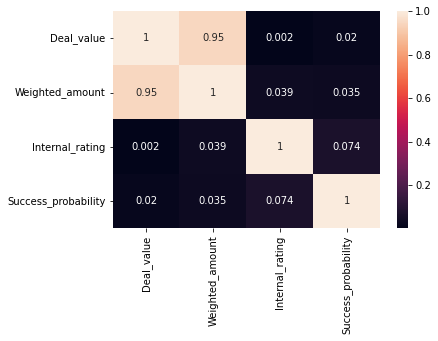

In [120]:
sb.heatmap(df.corr(),annot=True)
sb.set(rc={'figure.figsize':(15,15)})

In [121]:
num=list(df.select_dtypes(include=(np.number)).columns)

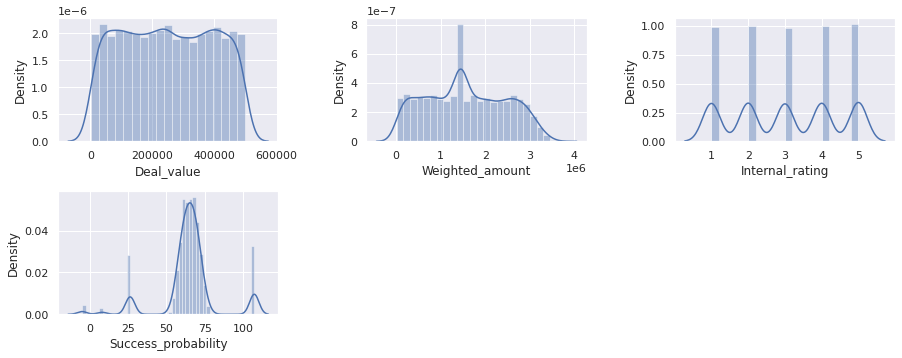

In [122]:
count=1
plt.subplots(figsize=(15,15))
for i in num:
  plt.subplot(5,3,count)
  sb.distplot(df[i])
  count+=1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

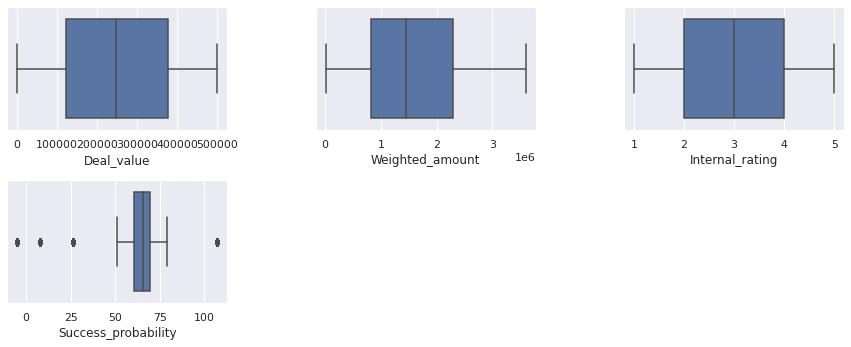

In [123]:
count=1
plt.subplots(figsize=(15,15))
for i in num:
  plt.subplot(5,3,count)
  sb.boxplot(df[i])
  count+=1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

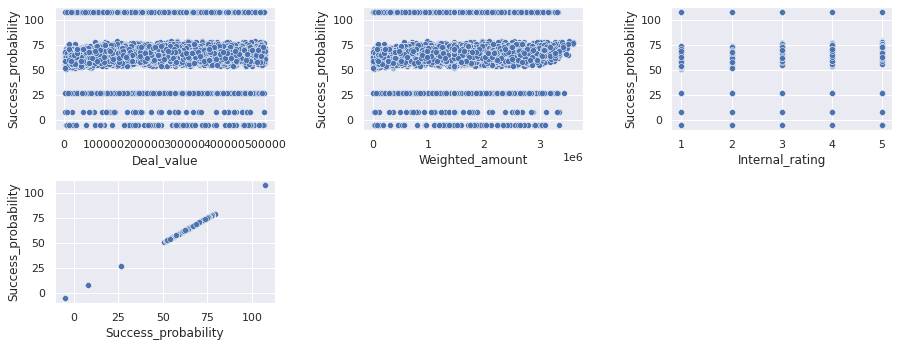

In [124]:
count=1
plt.subplots(figsize=(15,15))
for i in num:
  plt.subplot(5,3,count)
  sb.scatterplot(x=df[i],y=df['Success_probability'])
  count+=1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [144]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [133]:
df

,Deal_title,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,Restaurants,320506,2067263.70,Product_2,50 - 100 Million,Category 2,USA,Executive Vice President,Community pharmacist,Website,Level 3,"Davis,Sharrice A",No,3,73.60
1,TitleKIW18,Construction Services,39488,240876.80,Product_2,500 Million - 1 Billion,Category 4,India,Chairman/CEO/President,Recruitment consultant,Others,Level 1,"Brown,Maxine A",No,5,58.90
2,TitleFXSDN,Hospitals/Clinics,359392,2407926.40,Product_1,500 Million - 1 Billion,Category 4,USA,SVP/General Counsel,Health service manager,Marketing Event,Level 1,"Georgakopoulos,Vasilios T",No,4,68.80
3,TitlePSK4Y,Real Estate,76774,468321.40,Product_2,500 Million - 1 Billion,Category 3,USA,CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,"Brown,Maxine A",We have all the requirements,1,64.50
4,Title904GV,Financial Services,483896,1452260.00,Product_2,50 - 100 Million,Category 3,India,Executive Vice President,Media planner,Website,Level 2,"Thomas,Lori E",No,4,62.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,TitleJ7TDY,Banks,192800,1195360.00,Product_1,100 - 500 Million,Category 4,India,CEO/Co-Founder/Chairman,Call centre manager,Contact Email,Level 1,"Jones,Eyvette W",We have all the requirements,4,107.34
7003,TitleO1IIN,Hospitals/Clinics,220208,1453372.80,Product_2,100 - 500 Million,Category 1,India,CEO,Financial risk analyst,Marketing Event,Level 2,"Brown,Maxine A",We have all the requirements,3,26.35
7004,TitleF1FWY,Semiconductors,253608,1452260.00,Product_1,100 - 500 Million,Category 2,USA,SVP/General Counsel,Nature conservation officer,Marketing Event,Level 3,"Logan,Kevin N",No,1,70.60
7005,TitleXVBNJ,Banks,118615,794720.50,Product_1,500 Million - 1 Billion,Category 2,USA,Executive Vice President,"Designer, textile",Website,Level 3,"Cashin,Marc C",We have all the requirements,3,-5.00


In [145]:
l=list(df.columns)
l.remove('Success_probability')

In [146]:
x=df[l]
y=df['Success_probability']

In [147]:
df.drop(columns=['Deal_title'])

,Industry,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Internal_POC,Resource,Internal_rating,Success_probability
0,Restaurants,320506,2067263.70,Product_2,50 - 100 Million,Category 2,USA,Executive Vice President,Community pharmacist,Website,Level 3,"Davis,Sharrice A",No,3,73.60
1,Construction Services,39488,240876.80,Product_2,500 Million - 1 Billion,Category 4,India,Chairman/CEO/President,Recruitment consultant,Others,Level 1,"Brown,Maxine A",No,5,58.90
2,Hospitals/Clinics,359392,2407926.40,Product_1,500 Million - 1 Billion,Category 4,USA,SVP/General Counsel,Health service manager,Marketing Event,Level 1,"Georgakopoulos,Vasilios T",No,4,68.80
3,Real Estate,76774,468321.40,Product_2,500 Million - 1 Billion,Category 3,USA,CEO/Co-Founder/Chairman,"Therapist, speech and language",Contact Email,Level 2,"Brown,Maxine A",We have all the requirements,1,64.50
4,Financial Services,483896,1452260.00,Product_2,50 - 100 Million,Category 3,India,Executive Vice President,Media planner,Website,Level 2,"Thomas,Lori E",No,4,62.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,Banks,192800,1195360.00,Product_1,100 - 500 Million,Category 4,India,CEO/Co-Founder/Chairman,Call centre manager,Contact Email,Level 1,"Jones,Eyvette W",We have all the requirements,4,107.34
7003,Hospitals/Clinics,220208,1453372.80,Product_2,100 - 500 Million,Category 1,India,CEO,Financial risk analyst,Marketing Event,Level 2,"Brown,Maxine A",We have all the requirements,3,26.35
7004,Semiconductors,253608,1452260.00,Product_1,100 - 500 Million,Category 2,USA,SVP/General Counsel,Nature conservation officer,Marketing Event,Level 3,"Logan,Kevin N",No,1,70.60
7005,Banks,118615,794720.50,Product_1,500 Million - 1 Billion,Category 2,USA,Executive Vice President,"Designer, textile",Website,Level 3,"Cashin,Marc C",We have all the requirements,3,-5.00


In [151]:
X = df[['Deal_title', 'Industry', 'Pitch','Lead_revenue', 'Fund_category', 'Geography', 'Designation','Hiring_candidate_role', 'Lead_source', 'Level_of_meeting','Internal_POC', 'Resource']]

In [152]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,Deal_title_Title00IIZ,Deal_title_Title00VOR,Deal_title_Title013QQ,Deal_title_Title017NC,Deal_title_Title01ANN,Deal_title_Title01OGZ,Deal_title_Title01QOT,Deal_title_Title01QXQ,Deal_title_Title02VYQ,Deal_title_Title039A1,Deal_title_Title03OP2,Deal_title_Title03PWC,Deal_title_Title03VYX,Deal_title_Title04G3H,Deal_title_Title04RUJ,Deal_title_Title04V1K,Deal_title_Title051VZ,Deal_title_Title0534U,Deal_title_Title0554V,Deal_title_Title057C3,Deal_title_Title059PM,Deal_title_Title05BKD,Deal_title_Title05DHT,Deal_title_Title05G2K,Deal_title_Title062F6,Deal_title_Title064IO,Deal_title_Title069P1,Deal_title_Title06A33,Deal_title_Title06CB1,Deal_title_Title06DCS,Deal_title_Title06ELD,Deal_title_Title06P7L,Deal_title_Title06YF6,Deal_title_Title06ZO3,Deal_title_Title071YZ,Deal_title_Title073HB,Deal_title_Title07HDM,Deal_title_Title07QDI,Deal_title_Title080G4,Deal_title_Title087D0,...,"Internal_POC_Hebron,Artenia D","Internal_POC_Heidelberg,Andre D","Internal_POC_Himes,Maurice C","Internal_POC_Houston,Arnold E","Internal_POC_Irizarry,Yolanda","Internal_POC_Jones,Eyvette W","Internal_POC_Jones,Michael L","Internal_POC_Kiepea,Prince A","Internal_POC_Knox,Antonio D","Internal_POC_Leu,Darren L","Internal_POC_Logan,Kevin N","Internal_POC_Mabrey,Kevin C","Internal_POC_Maine,John P","Internal_POC_Massiah,Gerard F","Internal_POC_McKenstry,Loretta A","Internal_POC_Meli,Teresa V","Internal_POC_Moran,Natalie A","Internal_POC_Morsy,Omar A","Internal_POC_Murray,Younetta","Internal_POC_Pappas,Mark S","Internal_POC_Robinson,John C","Internal_POC_Rocks,Michael J","Internal_POC_Ross,Eric L","Internal_POC_Ryker,David","Internal_POC_Salyers,Daniel L","Internal_POC_Shelton,Sidney P","Internal_POC_Smith,Keenan H","Internal_POC_Sutton,Michelle R","Internal_POC_Thomas,Lori E","Internal_POC_Tondeur,Keith D","Internal_POC_Turner,Marlon D","Internal_POC_Ullrich,Rose Anne","Internal_POC_Van Arter,Derrick","Internal_POC_Vickers Jr.,Henry J","Internal_POC_Young,Valerie K",Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [153]:
Y = df['Success_probability']

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4204, 7899)
(2803, 7899)
(4204,)
(2803,)


In [155]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
print(model.intercept_)

56.15975114272731


In [157]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Deal_title_Title00IIZ,2.357888
Deal_title_Title00VOR,7.933857
Deal_title_Title013QQ,0.440326
Deal_title_Title017NC,-3.619940
Deal_title_Title01ANN,-32.834445
...,...
Resource_Deliverable,-0.395741
Resource_No,-0.759543
Resource_Not enough,-0.610481
Resource_We have all the requirements,0.912920


In [158]:
predictions = model.predict(X_test)
predictions

array([60.00355909, 65.76964256, 67.26488284, ..., 69.25676092,
       62.27983245, 59.95131948])

In [159]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                             OLS Regression Results                            
Dep. Variable:     Success_probability   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                     0.000
Date:                 Sun, 31 Oct 2021   Prob (F-statistic):                nan
Time:                         17:05:26   Log-Likelihood:             1.1825e+05
No. Observations:                 4204   AIC:                        -2.281e+05
Df Residuals:                        0   BIC:                        -2.014e+05
Df Model:                         4203                                         
Covariance Type:             nonrobust                                         
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [187]:
Predict = model.predict(X2)

In [188]:
solution = pd.DataFrame(Predict)

In [193]:
id = df2['Deal_title']
sample_solution = pd.concat([id,solution],axis=1)
sample_solution.columns = ['Deal_title','Success_Probability']

In [194]:
sample_solution.to_csv('sample_solution.csv')

In [195]:
ss=pd.read_csv("sample_solution.csv")

In [196]:
ss.head()

,Unnamed: 0,Deal_title,Success_Probability
0,0,TitleAD16O,76.467936
1,1,TitleOW6CR,58.900000
2,2,TitleVVJQ5,68.800000
3,3,TitleUS8NA,64.500000
4,4,Title5VGWW,62.400000
